# Climate Change Analysis in Tanzania

This notebook analyzes historical climate data from Tanzania to understand trends and patterns.

## 1. Data Collection and Loading

Start by loading the Tanzania climate dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
df = pd.read_csv('/content/tanzania_climate_data.csv')

# Display basic info
print("Dataset Info:")
print(df.info())

# Show first 5 rows
print("\nFirst 5 rows:")
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    int64  
 2   Average_Temperature_C  252 non-null    float64
 3   Total_Rainfall_mm      252 non-null    float64
 4   Max_Temperature_C      252 non-null    float64
 5   Min_Temperature_C      252 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 11.9 KB
None

First 5 rows:


,Year,Month,Average_Temperature_C,Total_Rainfall_mm,Max_Temperature_C,Min_Temperature_C
0,2000,1,26.1,19.8,32.0,21.9
1,2000,2,25.8,87.3,29.5,22.7
2,2000,3,26.8,266.5,29.9,21.8
3,2000,4,26.3,136.7,30.1,22.9
4,2000,5,26.0,63.1,30.7,22.4


## 2. Data Preprocessing

cleaning and preparing data for analysis.

In [4]:
# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Converting Year and Month to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df['Year_num'] = df['Year']  # Keep year as numerical value for modeling

# Checking the converted data
df[['Year', 'Month', 'Date', 'Year_num']].head()

Missing values in each column:
Year                     0
Month                    0
Average_Temperature_C    0
Total_Rainfall_mm        0
Max_Temperature_C        0
Min_Temperature_C        0
dtype: int64


,Year,Month,Date,Year_num
0,2000,1,2000-01-01,2000
1,2000,2,2000-02-01,2000
2,2000,3,2000-03-01,2000
3,2000,4,2000-04-01,2000
4,2000,5,2000-05-01,2000


In [5]:
# Creating seasonal categories
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

df['Season'] = df['Month'].apply(get_season)

# Showing seasonal distribution
df['Season'].value_counts()

,count
Season,
Summer,63
Autumn,63
Winter,63
Spring,63


## 3. Exploratory Data Analysis (EDA)
Exploring and visualizing data.

In [6]:
# Basic statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
              Year       Month  Average_Temperature_C  Total_Rainfall_mm  \
count   252.000000  252.000000             252.000000         252.000000   
mean   2010.000000    6.500000              25.707540         100.363889   
min    2000.000000    1.000000              24.200000           6.000000   
25%    2005.000000    3.750000              25.300000          39.325000   
50%    2010.000000    6.500000              25.700000          72.200000   
75%    2015.000000    9.250000              26.000000         147.700000   
max    2020.000000   12.000000              27.500000         297.400000   
std       6.067351    3.458922               0.541047          80.485087   

       Max_Temperature_C  Min_Temperature_C                           Date  \
count         252.000000         252.000000                            252   
mean           30.576587          21.698016  2010-06-16 14:17:08.571428608   
min            28.300000          19.700000            2000-01-

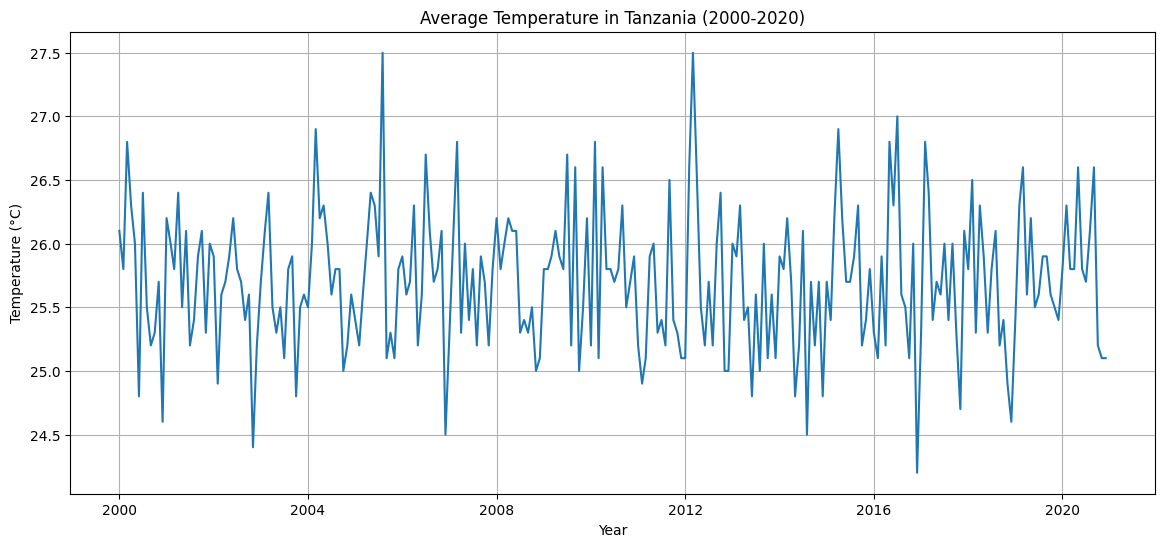

In [7]:
# Plot temperature trends over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Average_Temperature_C', data=df)
plt.title('Average Temperature in Tanzania (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

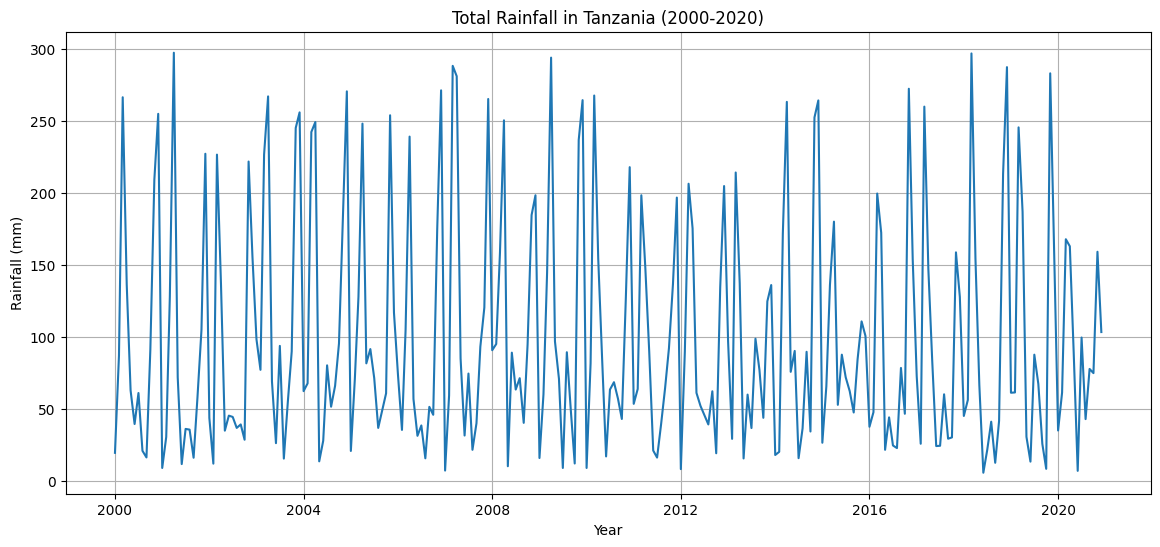

In [8]:
# Plot rainfall trends over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Total_Rainfall_mm', data=df)
plt.title('Total Rainfall in Tanzania (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

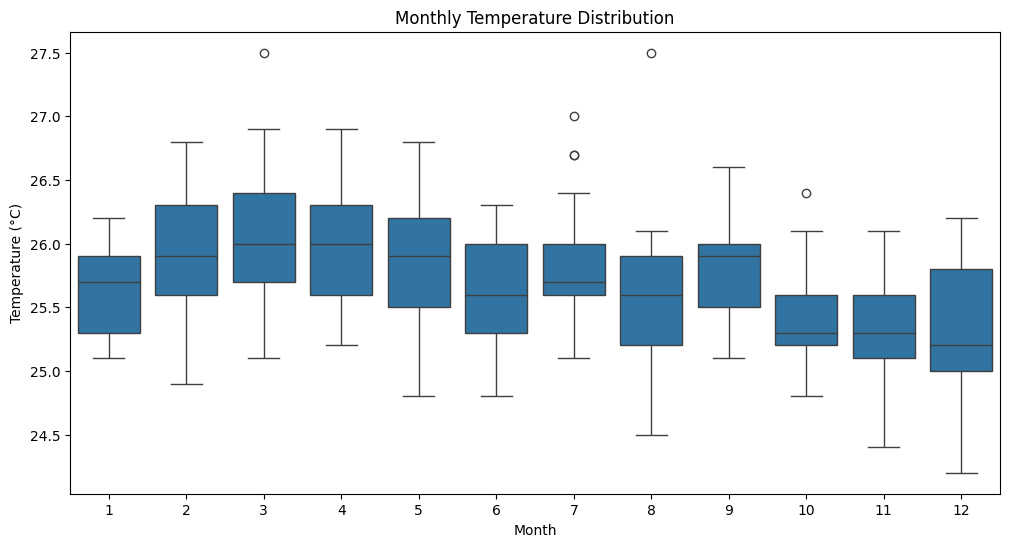

In [9]:
# Boxplot of temperatures by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Average_Temperature_C', data=df)
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

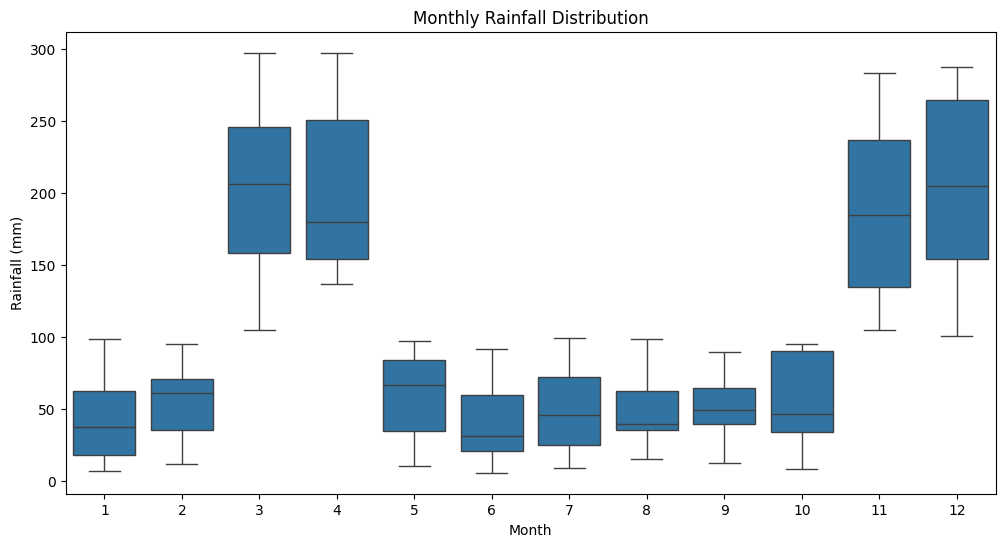

In [10]:
# Boxplot of rainfall by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Total_Rainfall_mm', data=df)
plt.title('Monthly Rainfall Distribution')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.show()


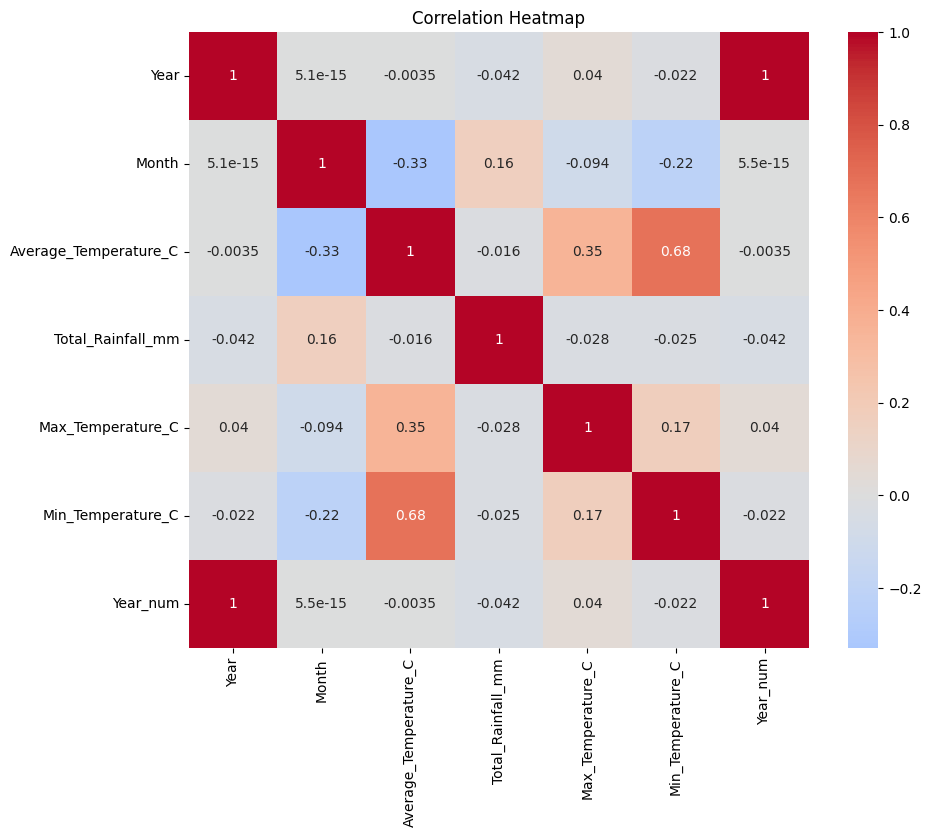

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


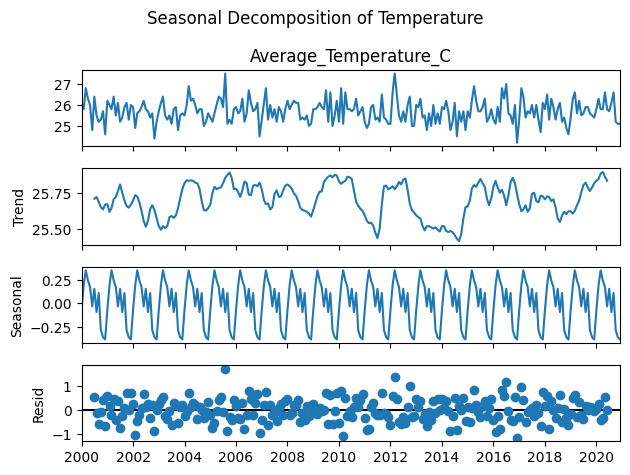

In [13]:
# Seasonal decomposition of temperature
# First i need to make sure the data is complete and at regular intervals
temp_series = df.set_index('Date')['Average_Temperature_C']
result = seasonal_decompose(temp_series, model='additive', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of Temperature')
plt.tight_layout()
plt.show()

## 4. Machine Learning Model Development
Building models to predict future temperatures.

In [14]:
# Preparing data for yearly temperature prediction
yearly_data = df.groupby('Year').agg({
    'Average_Temperature_C': 'mean',
    'Total_Rainfall_mm': 'sum'
}).reset_index()

# Features and target
X = yearly_data[['Year']]
y = yearly_data['Average_Temperature_C']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Model Performance:")
print(f"Mean Absolute Error: {mae:.2f}°C")
print(f"Root Mean Squared Error: {rmse:.2f}°C")

Model Performance:
Mean Absolute Error: 0.08°C
Root Mean Squared Error: 0.10°C


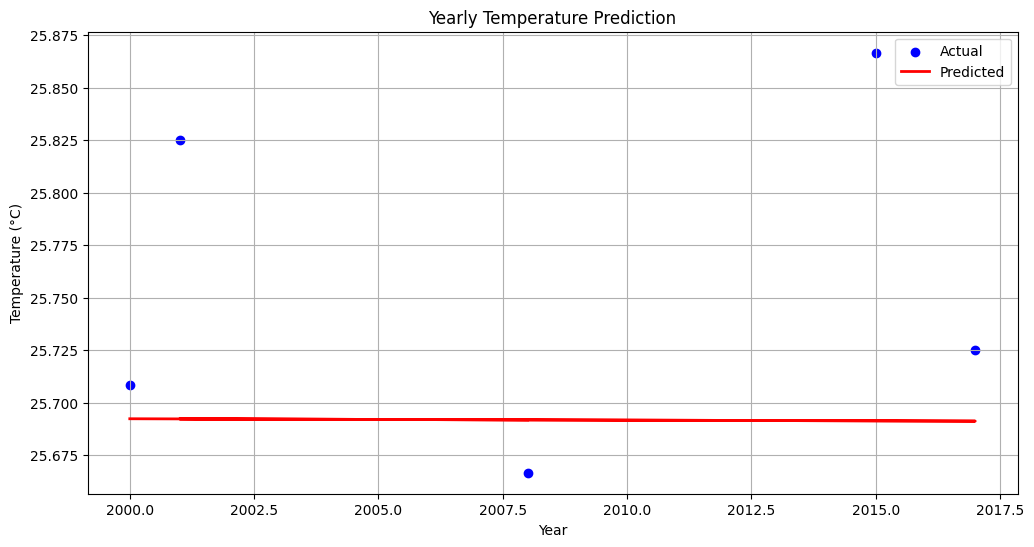

In [15]:
# Visualizing predictions vs actual for yearly data
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted')
plt.title('Yearly Temperature Prediction')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


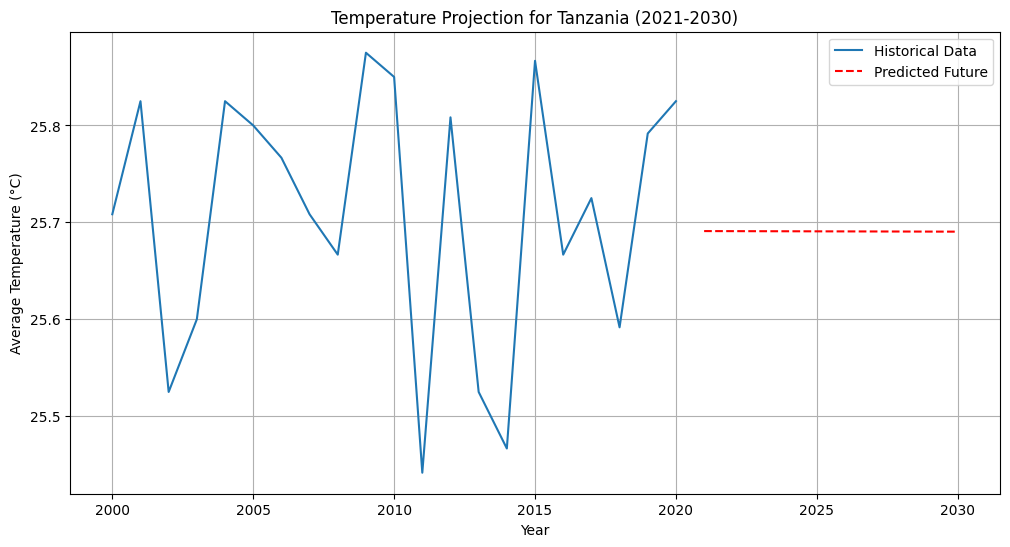

In [16]:
# Predicting future temperatures
future_years = np.array(range(2021, 2031)).reshape(-1, 1)
future_predictions = model.predict(future_years)

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Average_Temperature_C'], label='Historical Data')
plt.plot(future_years, future_predictions, 'r--', label='Predicted Future')
plt.title('Temperature Projection for Tanzania (2021-2030)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
